# Benchmark Algo on a simple problem
Minimizing the sinusoidale function between 0 and 2pi

In [1]:
import sys
sys.path.append("../")
from base import benchmark_simple
import numpy as np
import matplotlib.pyplot as plt


In [2]:
optimization_problem = [
    {
        "name": "x",
        "category": "uniform",
        "search_space": {
            "low": 0,
            "high": 2 * np.pi,
        }
    },
]


def function_to_optimize(x):
    return np.cos(x) + np.cos(2 * x + 1)

target = {"x": np.linspace(0, 2 * np.pi, 1000000)[
    np.argmin([function_to_optimize(x) for x in np.linspace(0, 2 * np.pi, 1000000)])]
}

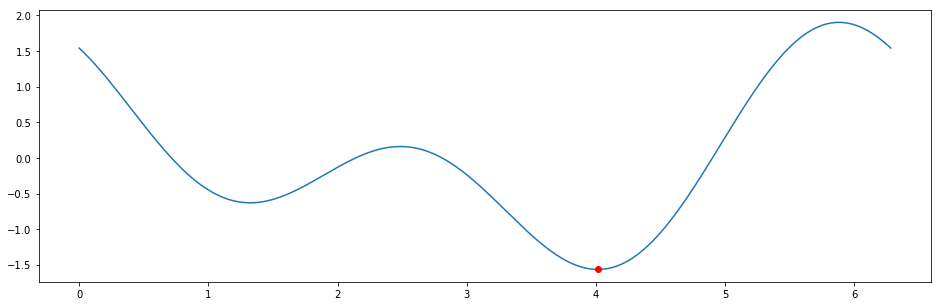

In [3]:
# plot target function
t = np.linspace(0, 2 * np.pi, 1000)
plt.figure(figsize=(16, 5))
plt.plot(t, function_to_optimize(t))
plt.plot([target["x"]], [function_to_optimize(**target)], "ro") 

In [4]:
seeds = list(range(50))

methods = ["random", "parzen_estimator"]

number_of_evaluations = [5, 10, 20, 30, 35, 40, 45, 50, 55, 60, 70, 80, 100, 150, 200, 300, 500]

In [5]:
results = benchmark_simple(
    function_to_optimize=function_to_optimize,
    optimization_problem=optimization_problem,
    target=target,
    methods=methods,
    number_of_evaluations=number_of_evaluations,
    seeds=seeds,
    parallel=True,
)

Number of trials: 1700


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 513 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   34.8s
[Parallel(n_jobs=-1)]: Done 729 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 850 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1269 tasks      | elapsed:

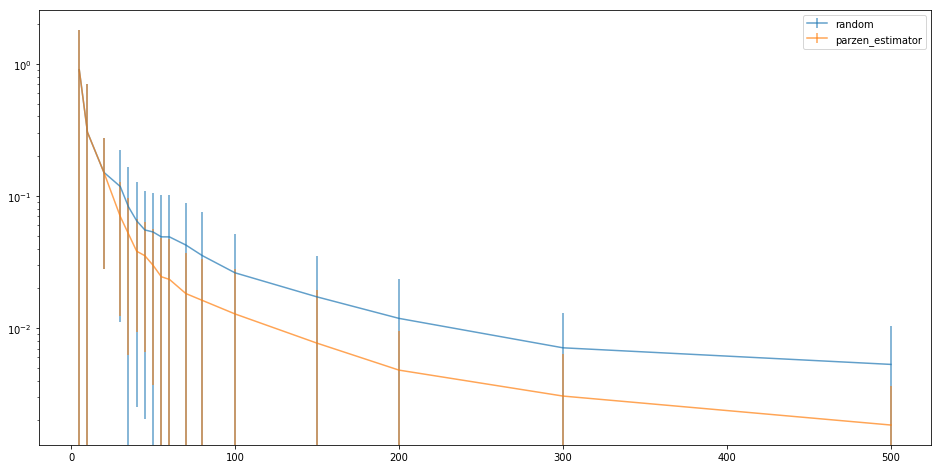

In [6]:
plt.figure(figsize=(16, 8))
for method in methods:
    plt.errorbar(
        x=number_of_evaluations,
        y=[results[method][number_of_evaluation]["mean"] for number_of_evaluation in number_of_evaluations],
        yerr=[results[method][number_of_evaluation]["std"] for number_of_evaluation in number_of_evaluations],
        label=method,
        alpha=0.7
    )
    plt.legend()
    plt.yscale("log")

In [7]:
from matplotlib import animation, rc
from IPython.display import HTML

from benderopt import minimize

def get_animation(number_of_evaluation=70, seed=None):

    lines = []
    samples = []
    fig = plt.figure(figsize=(14, 16))
    for k, method in enumerate(methods):
        samples.append(minimize(
            f=function_to_optimize,
            optimization_problem=optimization_problem,
            optimizer_type=method,
            number_of_evaluation=number_of_evaluation,
            seed=seed,
            debug=True
        ))

        ax = plt.subplot(len(methods), 1, k + 1)
        line, = ax.plot([], [], lw=2, marker="o", color="g", alpha=0.3, linestyle="")
        lines.append(line)
        t = np.linspace(0, 2 * np.pi, 2000)
        plt.plot(t, function_to_optimize(t), label=method)
        plt.plot([target["x"]], function_to_optimize(target["x"]), "ro")
        plt.legend()

    plt.close()

    def init():
        for line in lines:
            line.set_data([], [])
        return lines

    def animate(i):
        for k, line in enumerate(lines):
            x, y = line.get_data()
            x.append(samples[k][i]["x"])
            y.append(function_to_optimize(samples[k][i]["x"]))
            line.set_data(x, y)
        return lines

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=number_of_evaluation, interval=200, blit=True)
    return anim

In [8]:
anim = get_animation(number_of_evaluation=200, seed=12)
HTML(anim.to_html5_video())